## [개념정리]

### 평균이동
- 군집의 중심으로 지속적으로 움직임, 군집화 수행
but, 중심을 데이터가 모여있는 미로도가 가장 높은 곳으로 이동시킴

- 데이터의 분포도를 이용해 군집 중심점을 찾음
-KDE : 커널 함수를 통해 어떤 변수의 확률밀도함수를 추정하는 대표적인 방식

-> 개별 관측 데이터에 커널 함수 적용

-> 적용값을 더한후 개별 관측 데이터의 건수로 나눠 밀도함수 추정

  - 커널함수(K)
  - 확률변수값(x)
  - 관측값(xo)
  - 대역폭(h) : KDE 형태를 부드러운 형태로 평활하는데 적용

- 확률밀도함수 : 확률변수의 분포를 나타내는 함수

### GMM
-군집화를 적용하고자 하는 데이터가 여러개의 가우시안 분포를 가진 데이터 집합들을 섞여서 생성된 것이라는 가정하에 군집화 수행
- 모수 추정
  1) 개별 정규 분포의 평균과 분산
  2) 각 데이터가 어떤 정규 분포에 해당되는지의 확률

-> GMM은 EM 방법을 적용(Expectation and Maximization) 방법 적용

_________________________________________________________
## [코드필사]

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [3]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [4]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


In [5]:
import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

#estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth=estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


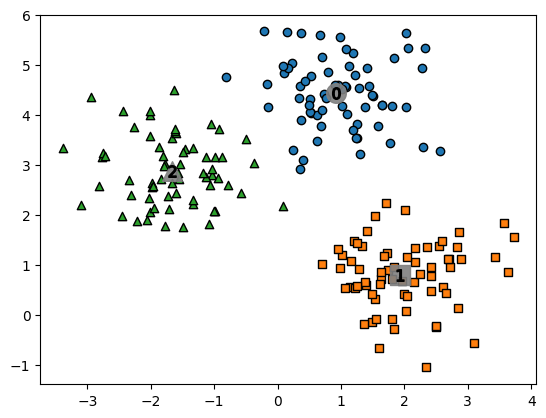

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster=clusterDF[clusterDF['meanshift_label']==label]
    center_x_y=centers[label]
    #군집 별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    #군집 별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,
              marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label)

plt.show()

In [8]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


In [9]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target

In [10]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster' 칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

#target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [11]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


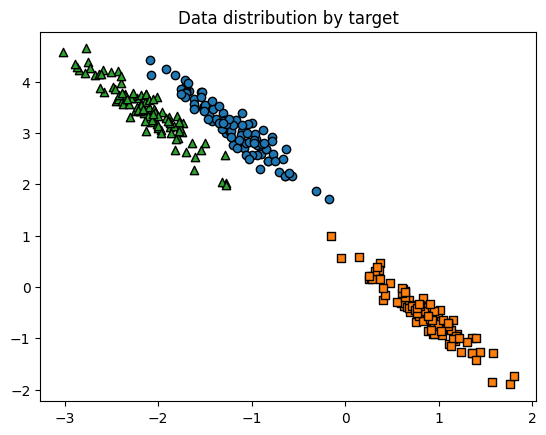

In [14]:
from sklearn.datasets import make_blobs

#make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y=make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation=[[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso=np.dot(X, transformation)
#feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF=pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

# visualize_cluster_plot 함수 정의 (누락된 함수 정의)
def visualize_cluster_plot(kmeans_model, cluster_data, target_name, iscenter=True):
    if iscenter :
        centers = kmeans_model.cluster_centers_

    unique_labels = np.unique(cluster_data[target_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = cluster_data[cluster_data[target_name]==label]
        if isNoise:
            marker = 'x'
        else:
            marker = markers[label % len(markers)]

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                    marker=marker)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                        alpha=0.9, edgecolor='k', marker=marker)
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='black',
                        edgecolor='k', marker='$%d$' % label)

    if iscenter:
        plt.title(f'Clustering results with {kmeans_model.__class__.__name__} centers')
    else:
        plt.title('Data distribution by target')
    plt.show()

#생성된 데이터 세트를 target 별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

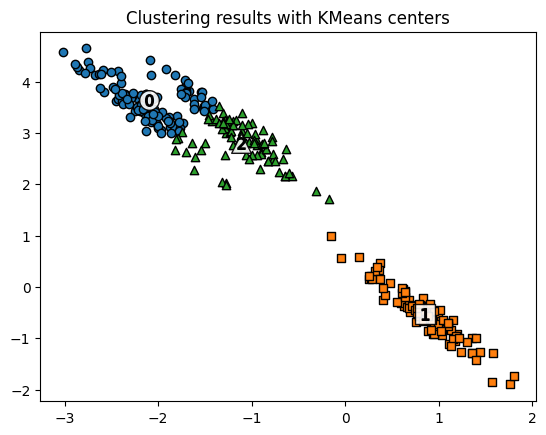

In [15]:
#3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans=KMeans(3, random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

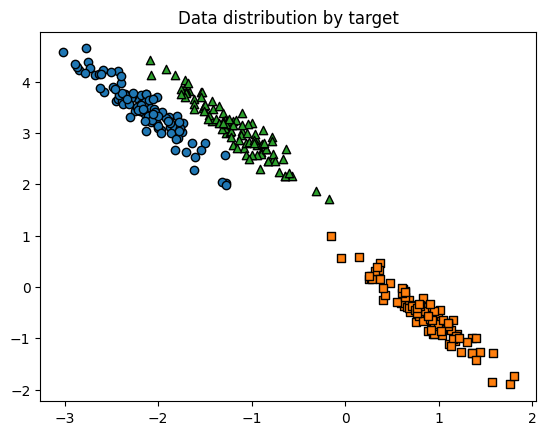

In [16]:
#3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm=GaussianMixture(n_components=3, random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

#GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [17]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64
